# CSE4502 Programming Assignment #1

## Follow the chapter 2 of the textbook and finish the code as an end-to-end machine learning project

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.data.ndim

2

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.target.ndim

1

In [9]:
boston.target.shape

(506,)

In [10]:
housing = np.c_[boston.data, boston.target]

In [11]:
housing = pd.DataFrame(housing)

In [12]:
housing.columns = list(boston.feature_names) + ['MEDV']

### Take a Quick Look

In [13]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Lets take a general distribution of our data:

In [15]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Check to see if there is any missing data:

In [16]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Now lets look at all the plots of our features.

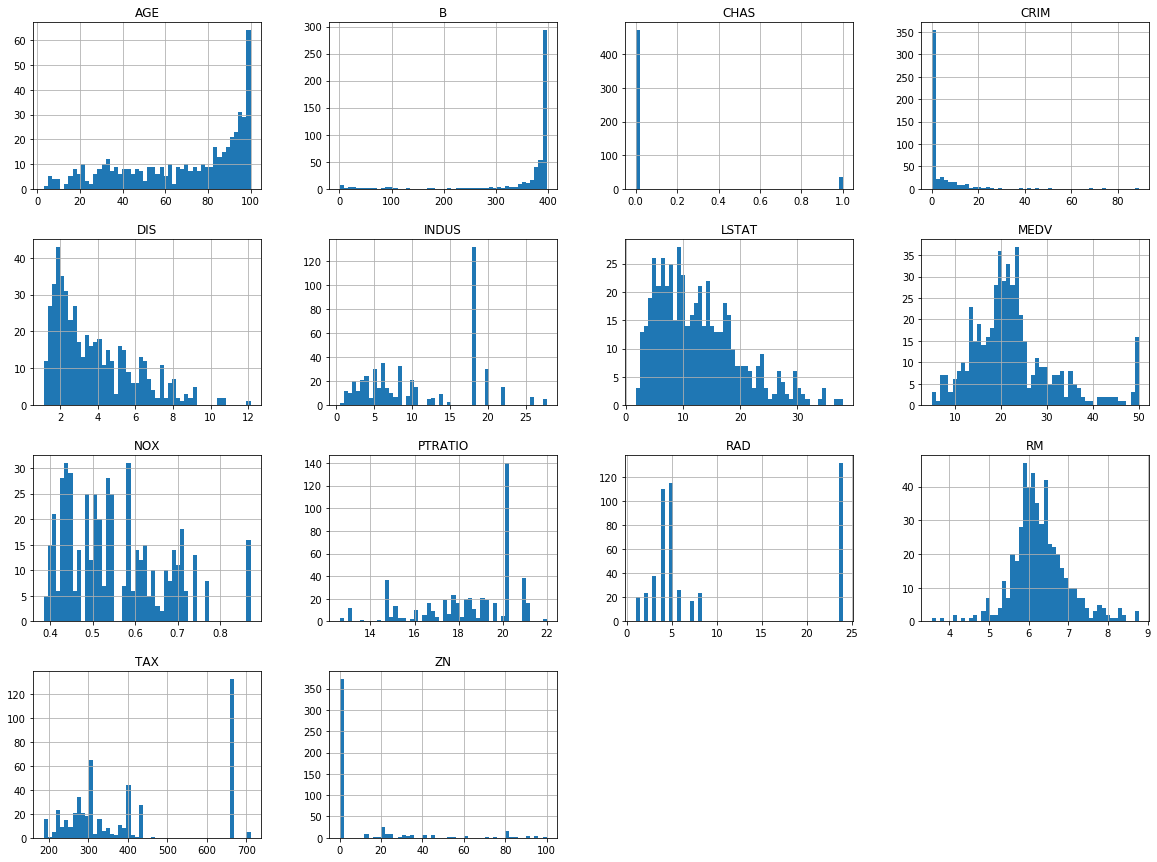

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Most data in the set look skewed and distributed unevenly. We will try to transform them closer to bell-curve like. But first will create out test set.

# Analyse the Data to Gain an Insight

Lets start by seeing the correlations of our features in the data to the target (Median House Price)

In [18]:
corr_matrix = housing.corr()

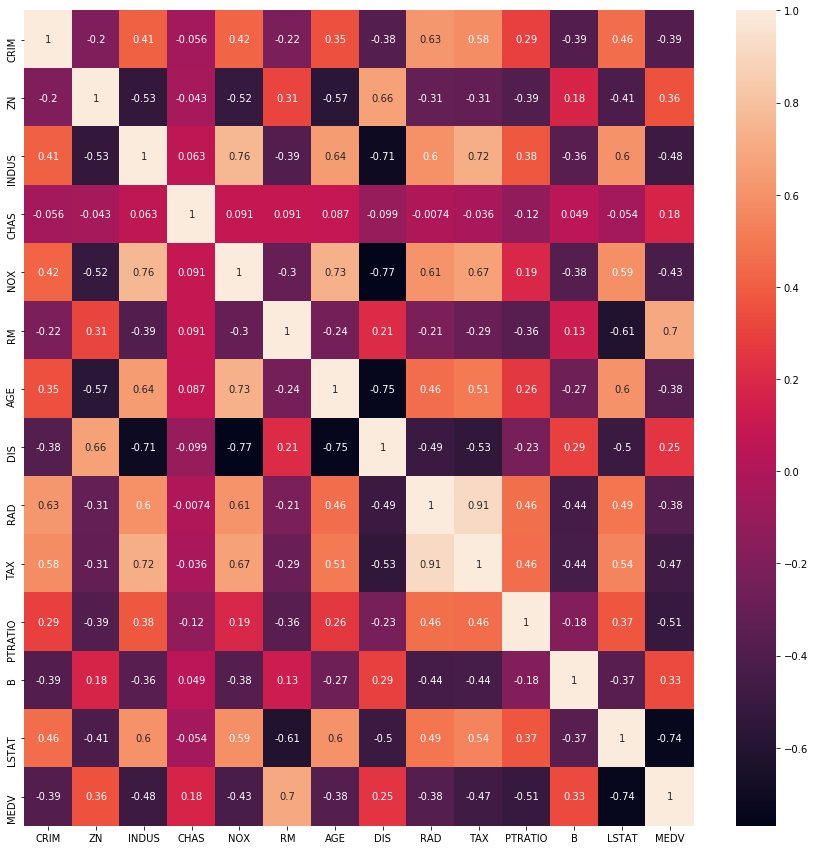

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr_matrix, annot=True,ax=ax)

In [20]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Using this matrix we can see some features correlated with median house value nicely. We will plot these to see it visually

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f568a90>,
      dtype=object)

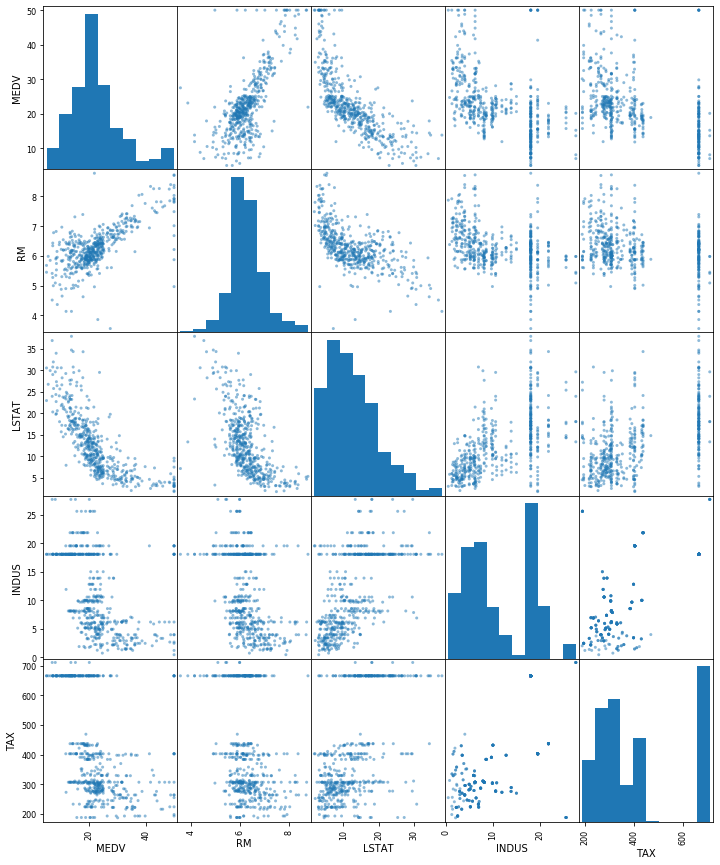

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "LSTAT", "INDUS","TAX"]
scatter_matrix(housing[attributes], figsize=(12, 15))

Looking at this we can clearly see that "LSTAT" - lower status of the population forms a "perfect" linear line with median value. In other words, as LSTAT increases, MEDV decreases. An inverse relationship. "RM" - average number of rooms per dwelling is another that holds a linear relationship but positive. These two will be vital for our machine learning model predictions

#### Lets zoom in on these plots

[5, 30, 0, 50]

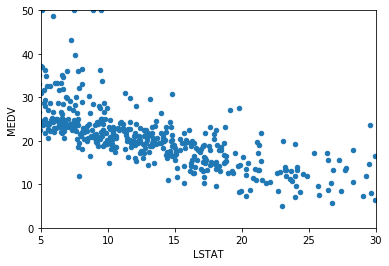

In [22]:
housing.plot(kind="scatter", x="LSTAT", y="MEDV")
plt.axis([5, 30, 0, 50])

[5, 8, 0, 50]

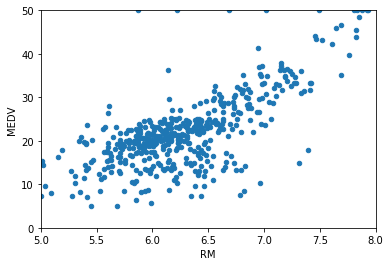

In [23]:
housing.plot(kind="scatter", x="RM", y="MEDV")
plt.axis([5, 8, 0, 50])

## Create a Test and Train Set

In [24]:
np.random.seed(42)

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [26]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1


# Prepare the Data

We will now revert back to our original data by copying and also droping the label and separating the label into another varible

In [27]:
housing = train_set.drop("MEDV", axis=1)
housing_labels = train_set["MEDV"].copy()

Normally, this would be the time to modify our categorical data and missing data. However, this data set contains neither of these things so we will move forward.

# Train a Model

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluate the Model

In [29]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1


In [30]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))

Predictions: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]


Compare with actual values:

In [31]:
print("Labels:", list(some_labels))

Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


In [32]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.652033184880168

In [33]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.3147716267832252

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [35]:
housing_predictions = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [37]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3.91912135 4.73670154 4.72685633 7.29147514 7.17997214 3.60867012
 5.20898263 5.05299416 3.12641968 5.29747581]
Mean: 5.014866890209079
Standard deviation: 1.299778245747662


In [38]:
lin_scores = cross_val_score(lin_reg, housing, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
 4.43145447 4.5777583  3.6723473  5.77030866]
Mean: 4.829441880454277
Standard deviation: 0.8896329730748583


In [39]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [40]:
housing_predictions = forest_reg.predict(housing)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.409453259281417

In [41]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.14867985 3.41513628 2.85968014 5.45864135 4.78700206 2.95979371
 3.87185168 2.74707284 2.49503876 4.76253751]
Mean: 3.6505434165753408
Standard deviation: 0.9699277345049182


In [42]:
scores = cross_val_score(lin_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      4.829442
std       0.937755
min       3.672347
25%       4.296196
50%       4.585205
75%       5.303887
max       6.714648
dtype: float64

In [43]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing, housing_labels)
housing_predictions = svm_reg.predict(housing)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

4.973962919472875

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [45]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [47]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.839103625942133 {'max_features': 2, 'n_estimators': 3}
4.182114762390252 {'max_features': 2, 'n_estimators': 10}
3.9613930619270388 {'max_features': 2, 'n_estimators': 30}
5.010726248531535 {'max_features': 4, 'n_estimators': 3}
3.970547126602063 {'max_features': 4, 'n_estimators': 10}
3.7649105480532006 {'max_features': 4, 'n_estimators': 30}
4.26826673556444 {'max_features': 6, 'n_estimators': 3}
3.8652947123037027 {'max_features': 6, 'n_estimators': 10}
3.6375269606663765 {'max_features': 6, 'n_estimators': 30}
4.380856205970893 {'max_features': 8, 'n_estimators': 3}
3.7789497214058803 {'max_features': 8, 'n_estimators': 10}
3.7075538764680926 {'max_features': 8, 'n_estimators': 30}
4.206258356561079 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.8908428821186463 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.109509431070862 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.819048408962631 {'bootstrap': False, 'max_features': 3, 'n_estimator

Lets evaluate different models with different parameters for max features and estimators

In [48]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056880,0.026720,0.008926,0.010888,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-17.823512,-30.405281,...,-23.416924,4.640027,17,-5.651634e+00,-6.434424e+00,-4.403020e+00,-5.400399e+00,-8.686495e+00,-6.115194e+00,1.440198e+00
1,0.075116,0.028976,0.008809,0.007102,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-12.754056,-24.449932,...,-17.490084,4.375605,12,-3.282502e+00,-3.455298e+00,-2.648772e+00,-3.353178e+00,-3.886080e+00,-3.325166e+00,3.979124e-01
2,0.284718,0.112980,0.022476,0.021733,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-12.385221,-19.596318,...,-15.692635,3.067873,9,-2.271310e+00,-2.006099e+00,-2.163580e+00,-2.561024e+00,-2.433412e+00,-2.287085e+00,1.954020e-01
3,0.048374,0.015809,0.021630,0.021361,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-22.000494,-34.519822,...,-25.107378,5.170859,18,-6.421201e+00,-5.398115e+00,-5.693729e+00,-7.918029e+00,-6.957229e+00,-6.477660e+00,9.041905e-01
4,0.054301,0.038352,0.003499,0.002312,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-13.071628,-19.737020,...,-15.765244,2.425650,10,-3.316386e+00,-2.967084e+00,-2.850778e+00,-3.061384e+00,-3.055826e+00,-3.050291e+00,1.534204e-01
5,0.277076,0.094871,0.010896,0.001969,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-11.445843,-19.022061,...,-14.174551,2.874329,4,-2.088906e+00,-2.197785e+00,-1.912169e+00,-2.442342e+00,-2.108590e+00,-2.149959e+00,1.730654e-01
6,0.072346,0.065897,0.004867,0.001237,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-17.615267,-20.117901,...,-18.218101,1.422535,14,-6.408277e+00,-4.773013e+00,-4.031211e+00,-5.550375e+00,-7.287829e+00,-5.610141e+00,1.153172e+00
7,0.093880,0.036687,0.006333,0.001886,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-11.928769,-19.604394,...,-14.940503,2.812469,7,-3.075297e+00,-2.545455e+00,-2.557962e+00,-2.567962e+00,-2.945561e+00,-2.738447e+00,2.259424e-01
8,0.241208,0.032688,0.023094,0.011823,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-10.160751,-18.926063,...,-13.231602,3.379981,1,-2.051593e+00,-1.917295e+00,-1.830829e+00,-2.228932e+00,-1.979343e+00,-2.001598e+00,1.348666e-01
9,0.034925,0.014742,0.008107,0.008181,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-16.677257,-23.991674,...,-19.191901,2.500955,16,-5.396581e+00,-4.463254e+00,-4.754771e+00,-5.622693e+00,-6.105665e+00,-5.268593e+00,5.924595e-01


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

Lets pick the best model to run on the test data:

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("MEDV", axis=1)
y_test = test_set["MEDV"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_predictions

In [ ]:
final_rmse

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

We could compute the interval manually like this using T scores:

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

We can compute the interval using Z scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)